In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [2]:
data=pd.read_csv("Holiday_Package.csv")

In [3]:
data.head(50)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
Unnamed: 0           872 non-null int64
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [5]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 0
(872, 8)


In [6]:
data = data.drop('Unnamed: 0',axis=1)

In [7]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 0
(872, 7)


In [8]:
data.tail(20)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
852,yes,46747,41,5,0,2,yes
853,no,38536,32,12,1,0,yes
854,no,27332,25,11,1,0,yes
855,yes,106302,47,13,0,0,yes
856,yes,49318,31,16,2,0,yes
857,no,56718,33,14,0,2,yes
858,yes,32206,28,5,0,2,yes
859,yes,47837,38,11,0,0,yes
860,yes,37380,34,9,1,1,yes
861,yes,35191,33,6,0,2,yes


In [9]:
data[data.isnull().any(axis=1)]

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [10]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [11]:
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [12]:
data.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null int8
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null int8
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [14]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.0,0.0,0.0,1.0,1.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872.0,0.247706,0.431928,0.0,0.0,0.0,0.0,1.0


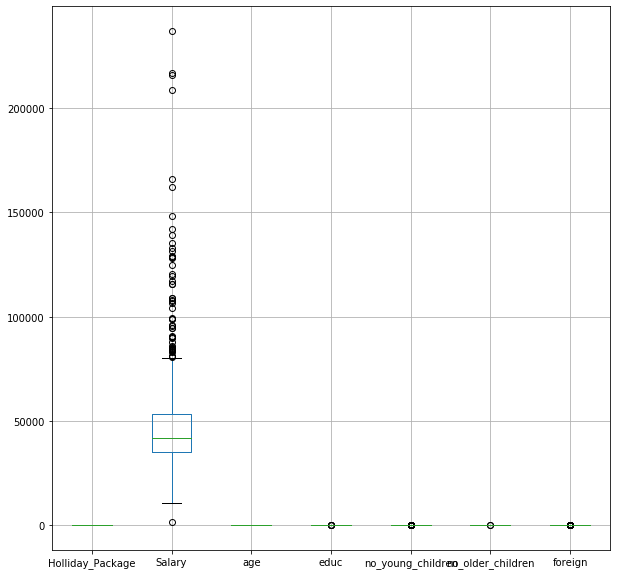

In [15]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data.boxplot()

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for column in data.columns:
        lr,ur=remove_outlier(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])

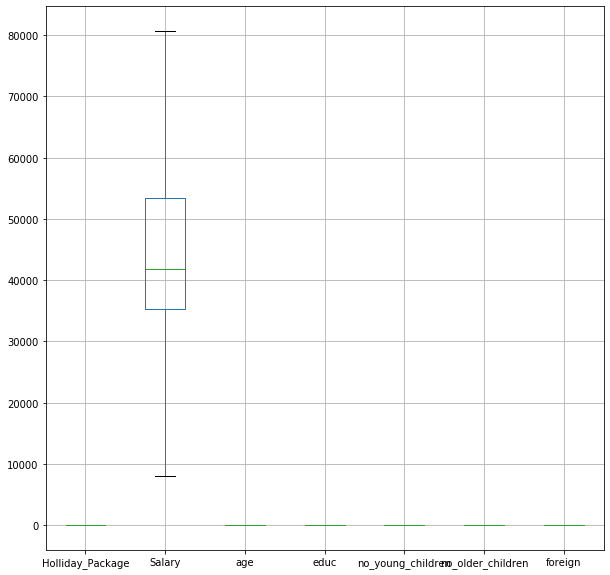

In [18]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data.boxplot()

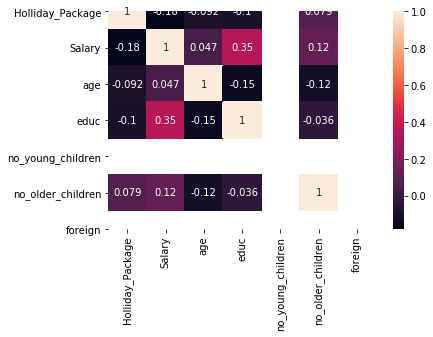

In [19]:
sns.heatmap(data.corr(), annot=True)

In [20]:
data.describe()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872.000000,872.000000,872.000000,872.0,872.000000,872.0
mean,0.459862,45608.336869,39.955275,9.302752,0.0,0.980505,0.0
std,0.498672,15699.745151,10.551675,3.014712,0.0,1.077197,0.0
min,0.000000,8105.750000,20.000000,2.000000,0.0,0.000000,0.0
25%,0.000000,35324.000000,32.000000,8.000000,0.0,0.000000,0.0
50%,0.000000,41903.500000,39.000000,9.000000,0.0,1.000000,0.0
75%,1.000000,53469.500000,48.000000,12.000000,0.0,2.000000,0.0
max,1.000000,80687.750000,62.000000,18.000000,0.0,5.000000,0.0


In [21]:
data.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,0.0,40030.0,24.0,4.0,0.0,1.0,0.0
868,1.0,32137.0,48.0,8.0,0.0,0.0,0.0
869,0.0,25178.0,24.0,6.0,0.0,0.0,0.0
870,1.0,55958.0,41.0,10.0,0.0,1.0,0.0
871,0.0,74659.0,51.0,10.0,0.0,0.0,0.0


In [22]:
data.drop(['no_young_children','foreign'], axis = 1,inplace=True)

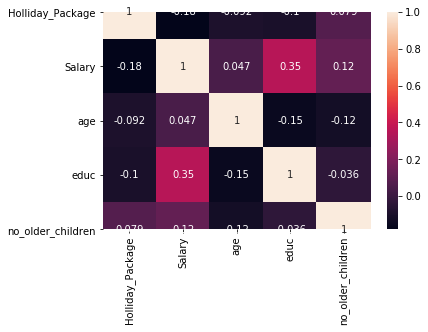

In [23]:
sns.heatmap(data.corr(), annot=True)

C:\Users\manuraj.ls\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\manuraj.ls\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


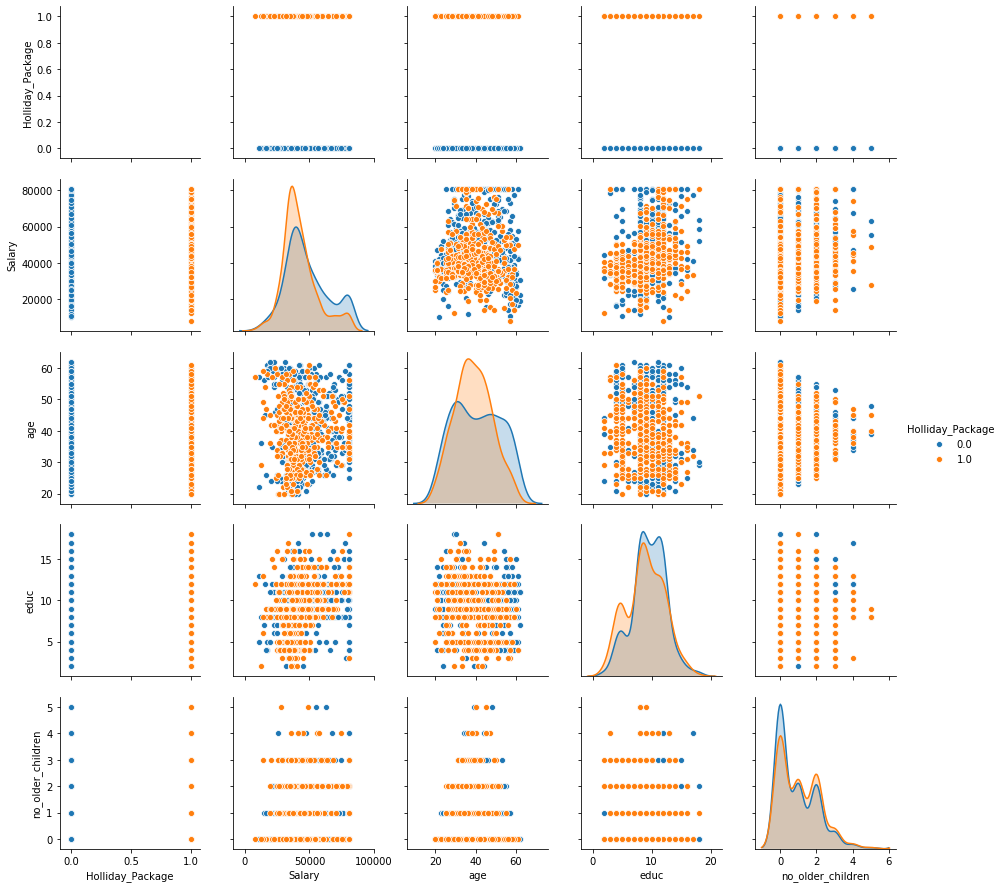

In [24]:
# Pairplot using sns
sns.pairplot(data, hue='Holliday_Package', diag_kind = 'kde')

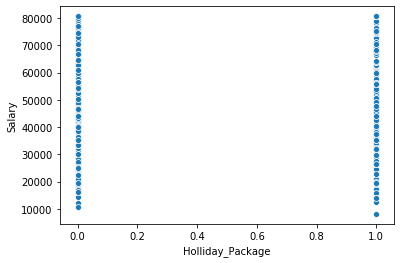

In [41]:
sns.scatterplot(data['Holliday_Package'], data['Salary']) 

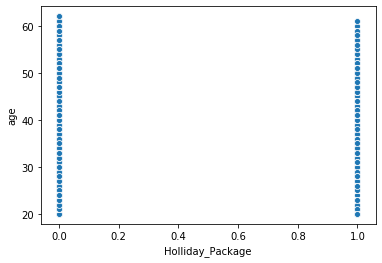

In [42]:
sns.scatterplot(data['Holliday_Package'], data['age']) 

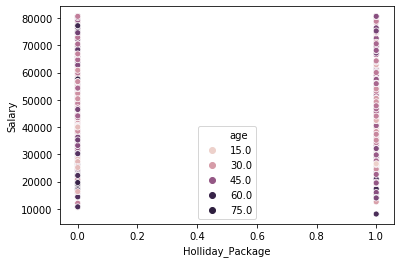

In [43]:
sns.scatterplot(data['Holliday_Package'], data['Salary'],data['age']) 

In [25]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package']

In [26]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [27]:
model = LogisticRegression(max_iter=10000,solver='newton-cg',penalty='none')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

C:\Users\manuraj.ls\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\manuraj.ls\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\manuraj.ls\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\manuraj.ls\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\manuraj.ls\AppData\Local\Contin

In [28]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.6145038167938931


In [29]:
model_score = model.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.5524590163934426


In [30]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[89 56]
 [45 72]] 

Classification Report 
               precision    recall  f1-score   support

         0.0       0.66      0.61      0.64       145
         1.0       0.56      0.62      0.59       117

    accuracy                           0.61       262
   macro avg       0.61      0.61      0.61       262
weighted avg       0.62      0.61      0.62       262



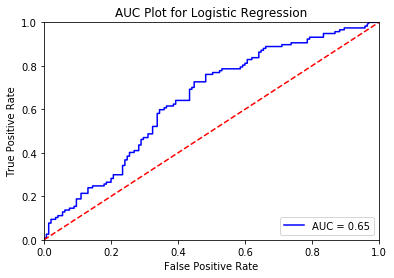

In [31]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('AUC Plot for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

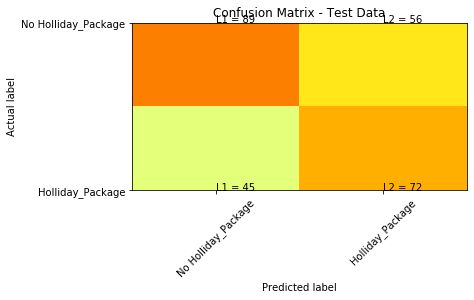

In [32]:
## Alternate Option: A more pleasing way to get this data is to plot it. 
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Holliday_Package', 'Holliday_Package']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['L1', 'L2'], ['L1','L2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

In [34]:
model1=clf.fit(X_train,y_train)
model1

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [35]:
# Predict it
pred_class = model1.predict(X_test)

In [36]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

         0.0       0.66      0.61      0.64       145
         1.0       0.56      0.62      0.59       117

    accuracy                           0.61       262
   macro avg       0.61      0.61      0.61       262
weighted avg       0.62      0.61      0.62       262



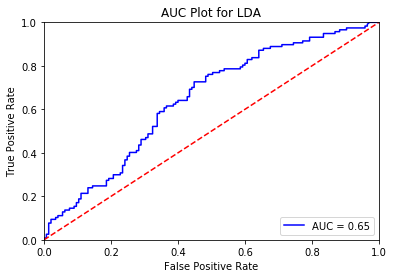

In [37]:
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('AUC Plot for LDA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, pred_class),'\n')

Confusion Matrix 
 [[89 56]
 [45 72]] 

